# Dimensionality Reduction in Python by Ninh Nguyen

In [1]:
#import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1','Type 2']

# Create a new DataFrame by subselecting the chosen features
df_selected = pokemon[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
df_selected.head()


,HP,Attack,Defense,Name,Type 1,Type 2
0,45,49,49,Bulbasaur,Grass,Poison
1,60,62,63,Ivysaur,Grass,Poison
2,80,82,83,Venusaur,Grass,Poison
3,80,100,123,VenusaurMega Venusaur,Grass,Poison
4,39,52,43,Charmander,Fire,NaN


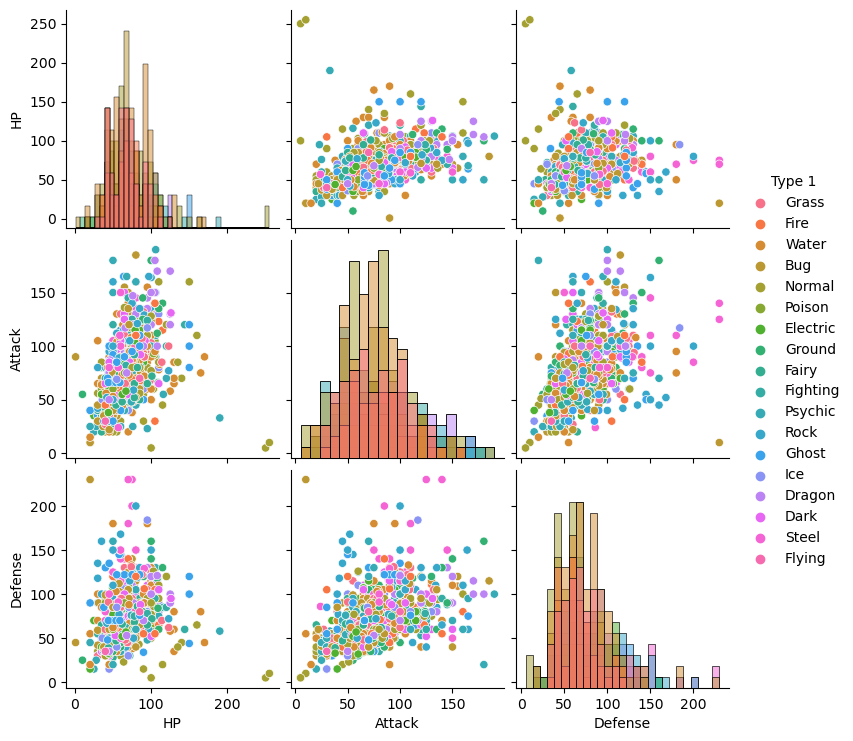

In [4]:
# Create a pairplot and color the points using a feature
sns.pairplot(df_selected, hue='Type 1', diag_kind='hist')

# Show the plot
plt.show()


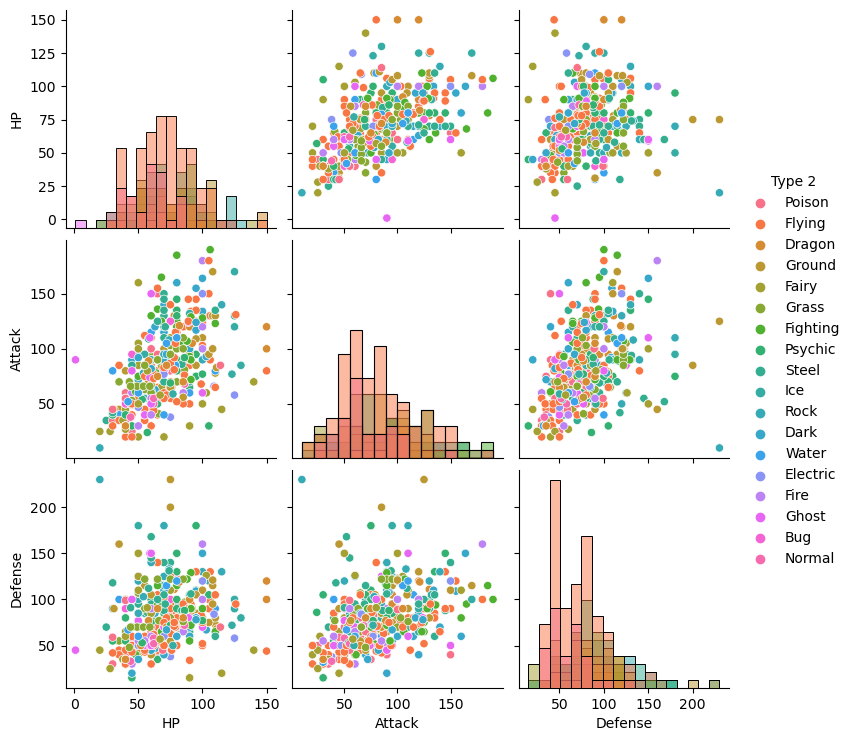

In [5]:
# Create a pairplot and color the points using a feature
sns.pairplot(df_selected, hue='Type 2', diag_kind='hist')

# Show the plot
plt.show()


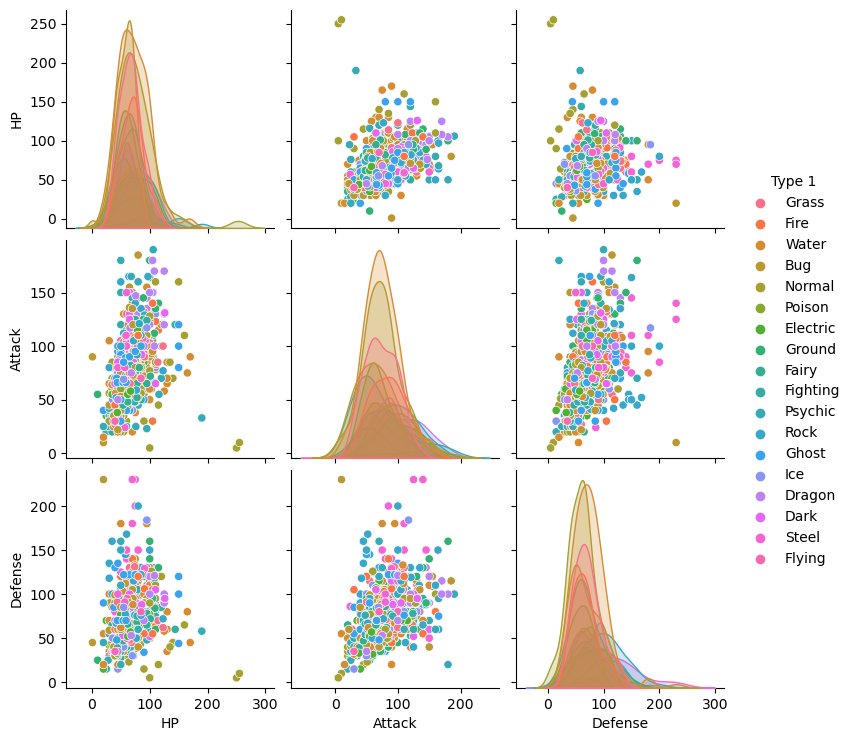

In [6]:
# Remove one of the redundant features 
reduced_df = df_selected.drop('Name', axis=1)

# Create a pairplot and color the points using a feature
sns.pairplot(reduced_df, hue='Type 1')

# Show the plot
plt.show()


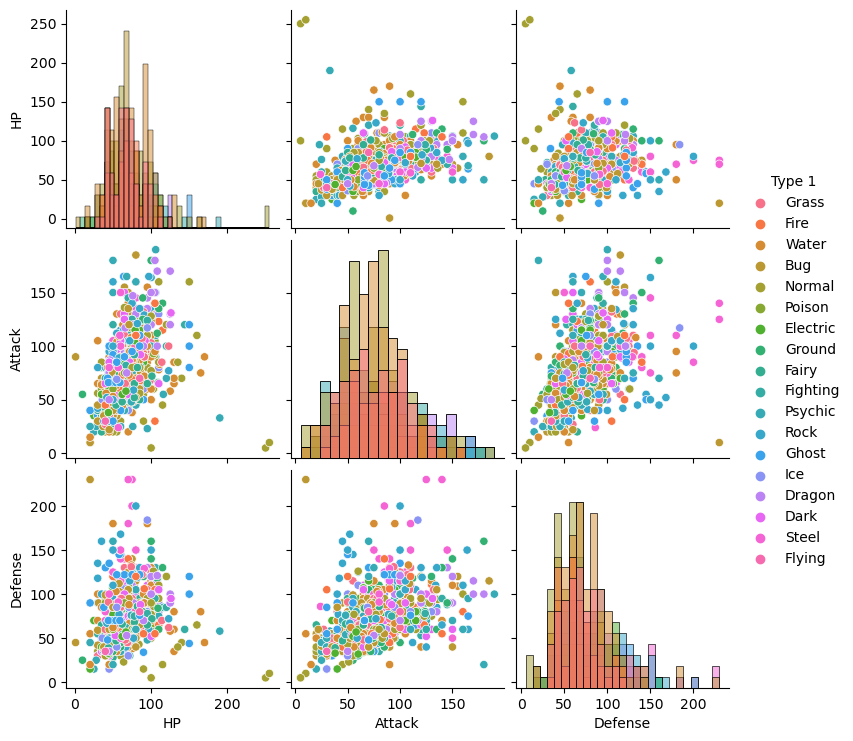

In [7]:
# Remove one of the redundant features 
reduced_df = df_selected.drop('Name', axis=1)

# Create a pairplot and color the points using a feature
sns.pairplot(reduced_df, hue='Type 1', diag_kind='hist')

# Show the plot
plt.show()


In [8]:
# Non-numerical columns in the dataset
non_numeric = ['Name','Type 1','Type 2']

# Drop the non-numerical columns from df
df_numeric = df_selected.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)


(800, 2)


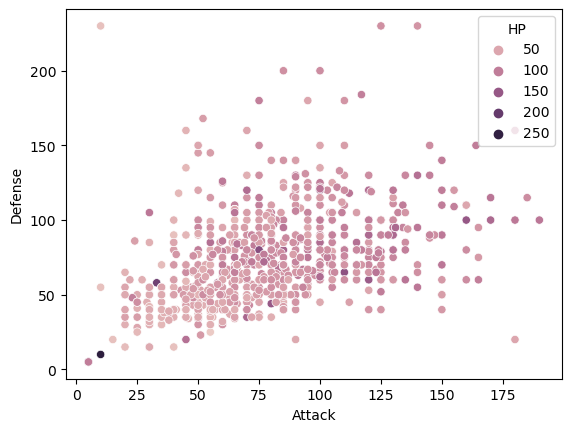

In [9]:
# Color the points according to Component
sns.scatterplot(x="Attack", y="Defense", hue='HP', data=df_selected)

# Show the plot
plt.show()


In [10]:
indian = pd.read_csv('PimaIndians.csv')
indian


,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive
...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,positive
388,1,128,88,39,110,36.5,1.057,37,positive
389,2,88,58,26,16,28.4,0.766,22,negative
390,10,101,76,48,180,32.9,0.171,63,negative


In [11]:
# Leave this list as is
number_cols = ['pregnant', 'glucose', 'diastolic','triceps','insulin','bmi','family','age']

# Remove the feature without variance from this list
non_number_cols = ['test']

# Create a new DataFrame by subselecting the chosen features
df_indian = indian[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
df_indian.head()


,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


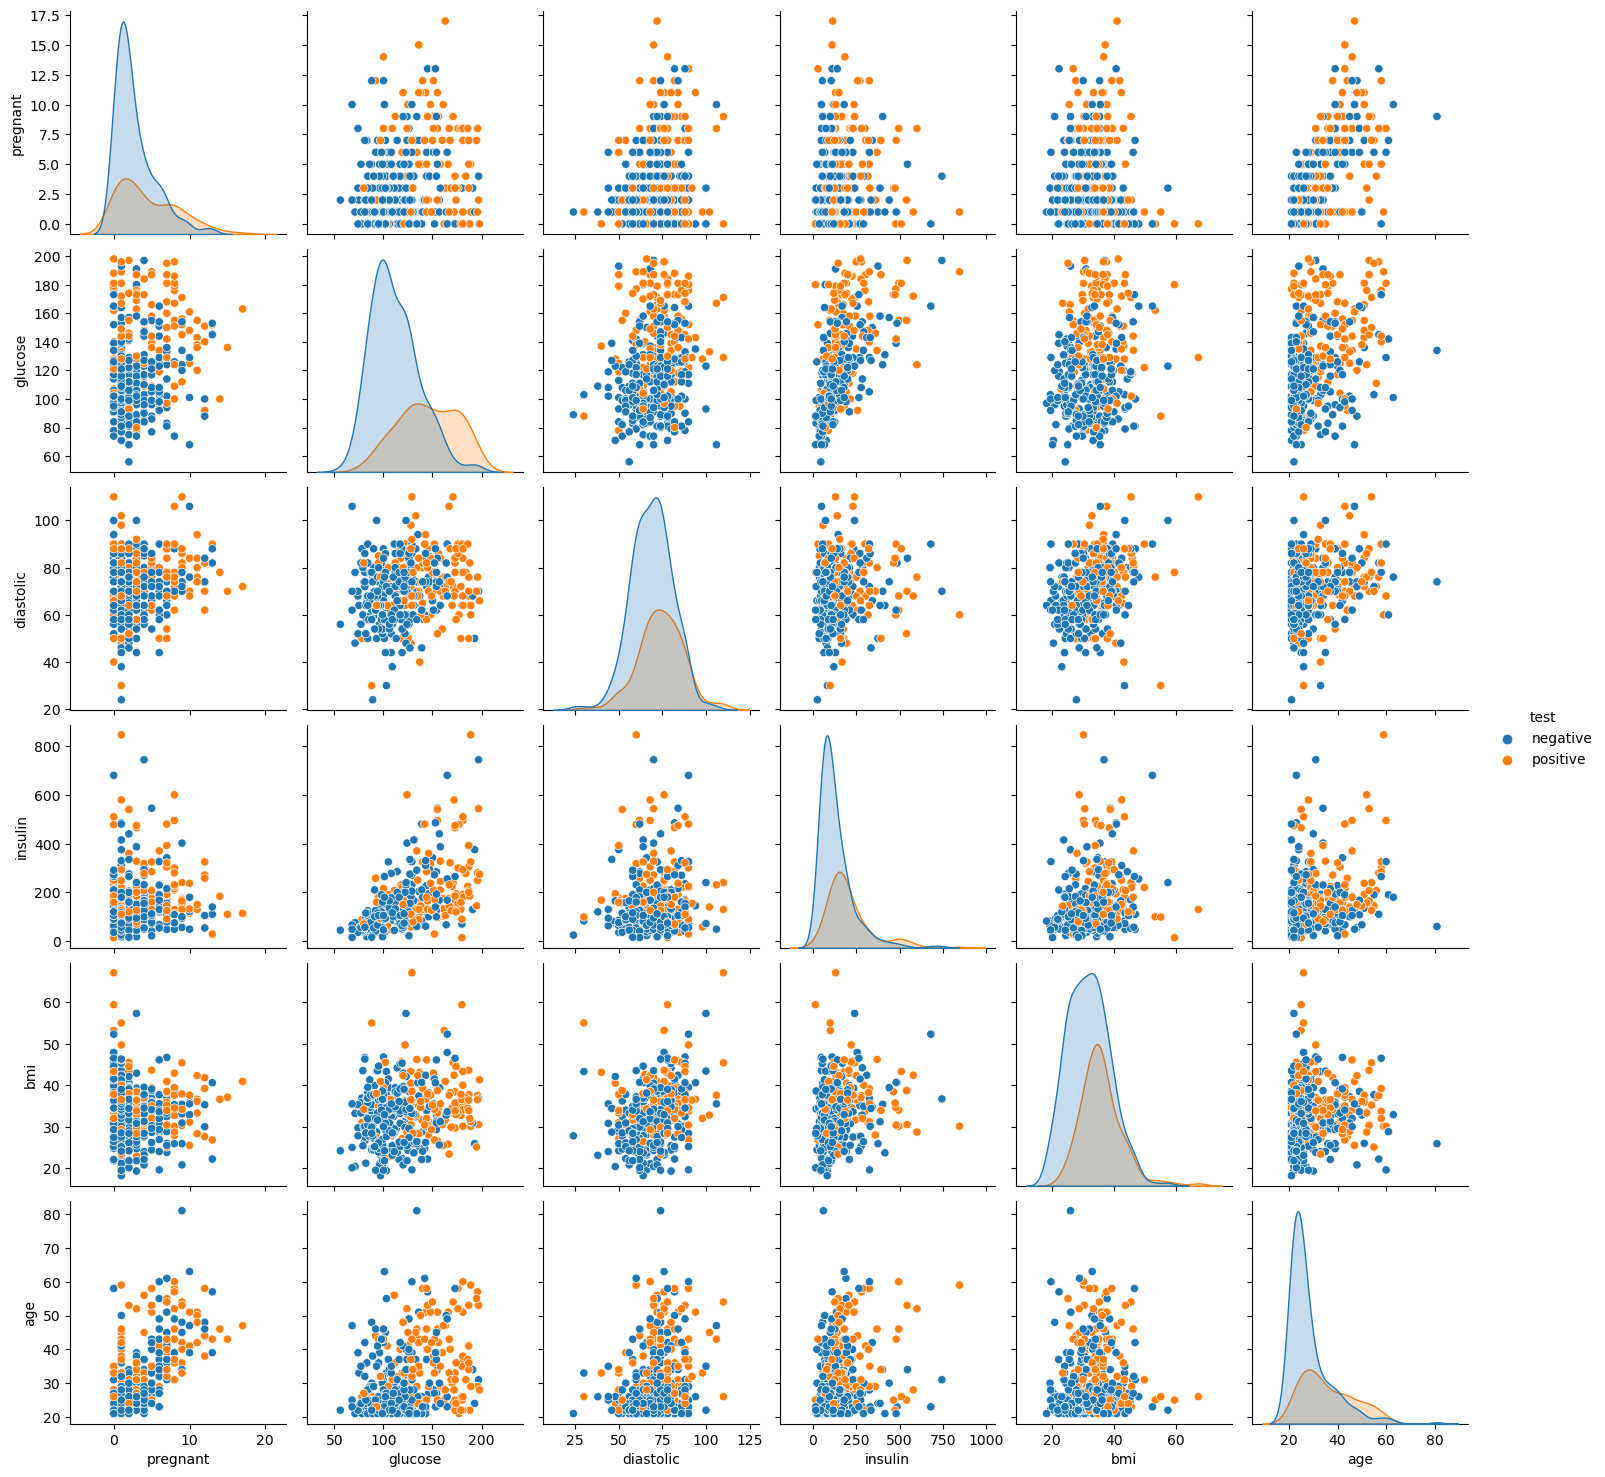

In [12]:
# Remove one of the redundant features 
reduced_df_indian = df_indian.drop(columns=['triceps','family'], axis=1)

# Create a pairplot and color the points using a feature
sns.pairplot(reduced_df_indian, hue='test')

# Show the plot
plt.show()


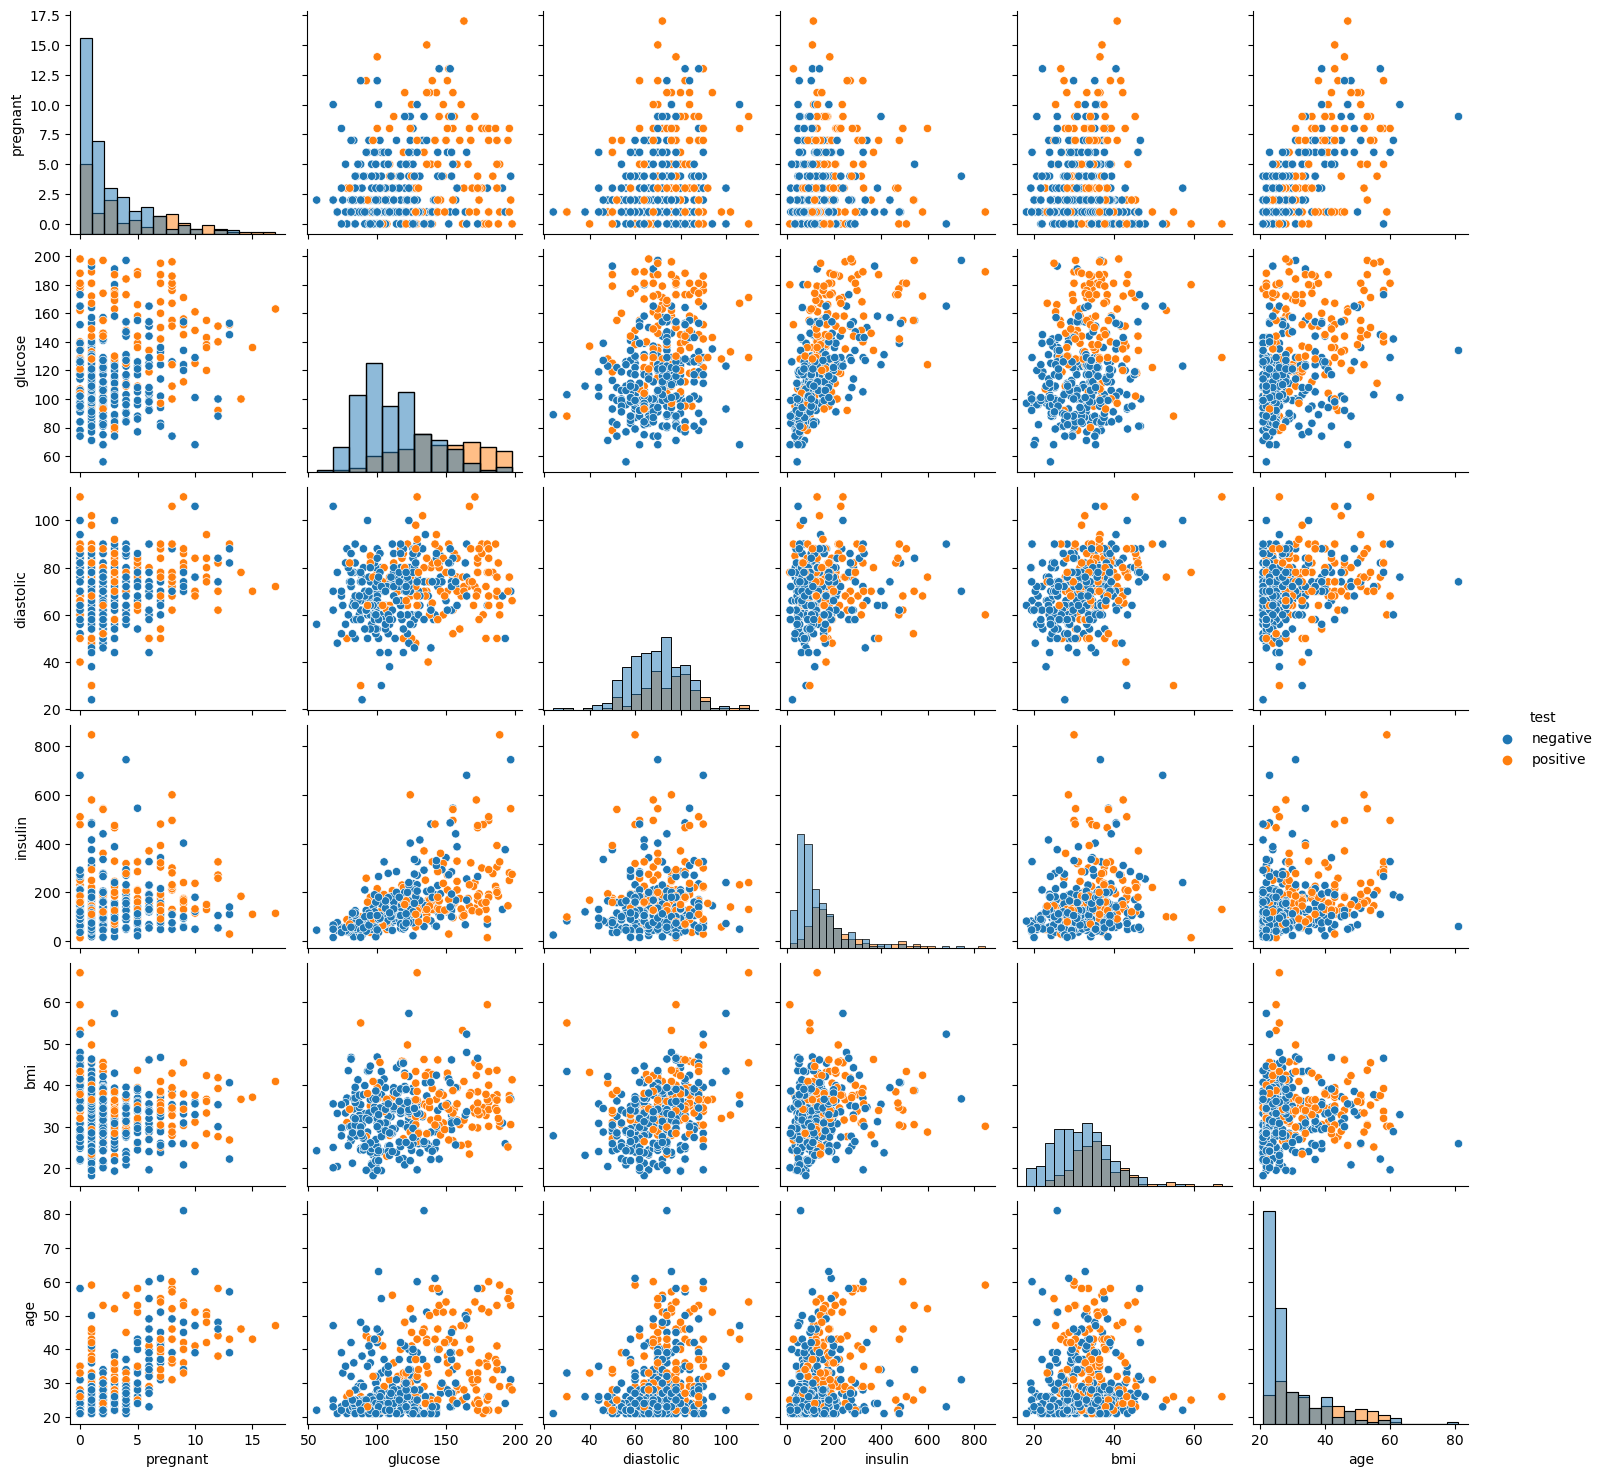

In [13]:
# Create a pairplot and color the points using a feature
sns.pairplot(reduced_df_indian, hue='test', diag_kind='hist')

# Show the plot
plt.show()


In [14]:
# Non-numerical columns in the dataset
non_numeric_indian = ['test']

# Drop the non-numerical columns from df
df_numeric_indian = df_indian.drop(non_numeric_indian, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric_indian)
print(tsne_features.shape)


(392, 2)


In [15]:
# Select the column as the feature to be predicted (y)
y = df_indian['test']

# Remove the column to create the training data
X = df_indian.drop('test', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")


118 rows in test set vs. 274 in training set, 8 Features.


In [16]:
# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")


72.9% accuracy on test set vs. 80.3% on training set


In [17]:
# Assign just the 'bmi' column from df_indian to X
X = df_indian[['bmi']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")


63.6% accuracy on test set vs. 68.6% on training set


In [18]:
df_numeric_indian


,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26
388,1,128,88,39,110,36.5,1.057,37
389,2,88,58,26,16,28.4,0.766,22
390,10,101,76,48,180,32.9,0.171,63


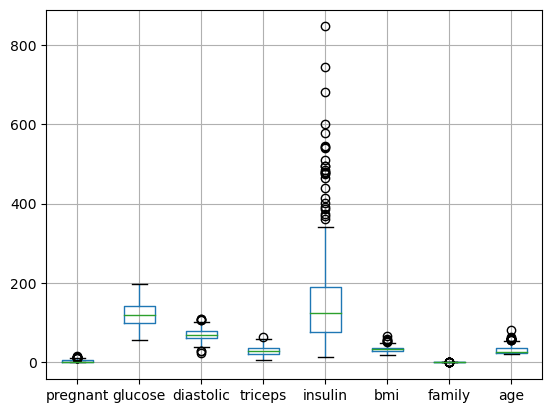

In [19]:
# Create the boxplot
df_numeric_indian.boxplot()

plt.show()


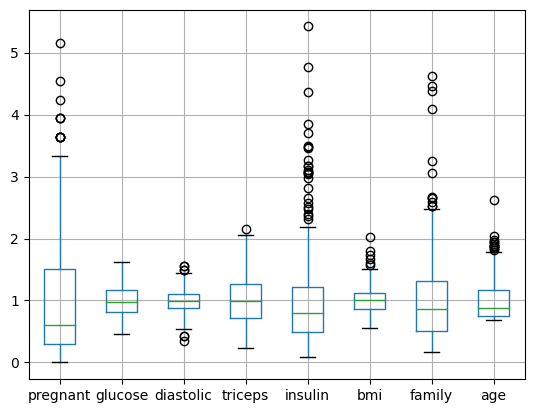

In [20]:
# Normalize the data
normalized_df = df_numeric_indian / df_numeric_indian.mean()

normalized_df.boxplot()
plt.show()


In [21]:
# Normalize the data
normalized_df = df_numeric_indian / df_numeric_indian.mean()

# Print the variances of the normalized data
print(normalized_df.var())


pregnant     0.946453
glucose      0.063334
diastolic    0.031272
triceps      0.130195
insulin      0.579931
bmi          0.045116
family       0.436301
age          0.109229
dtype: float64


In [22]:
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(df_numeric_indian / df_numeric_indian.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = df_numeric_indian.loc[:, mask]

print(f"Dimensionality reduced from {df_numeric_indian.shape[1]} to {df_numeric_indian.shape[1]}.")


Dimensionality reduced from 8 to 8.


In [23]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = df_numeric_indian.isna().sum() / len(df_numeric_indian) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = df_numeric_indian.loc[:, mask]

print(df_numeric_indian.shape)
print(reduced_df.shape)


(392, 8)
(392, 8)


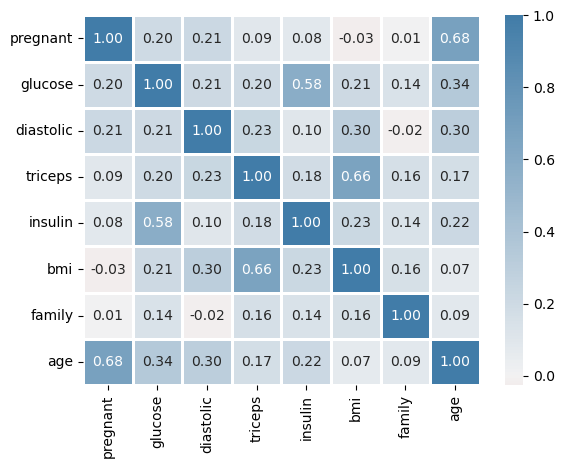

In [24]:
# Create the correlation matrix
corr = df_numeric_indian.corr()

cmap = sns.diverging_palette(h_neg=10,
                              h_pos=240,
                              as_cmap=True)

# Draw a heatmap of the correlation matrix
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


In [25]:
# Create the correlation matrix
corr = df_numeric_indian.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)


[[ True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True]
 [False False False  True  True  True  True  True]
 [False False False False  True  True  True  True]
 [False False False False False  True  True  True]
 [False False False False False False  True  True]
 [False False False False False False False  True]]


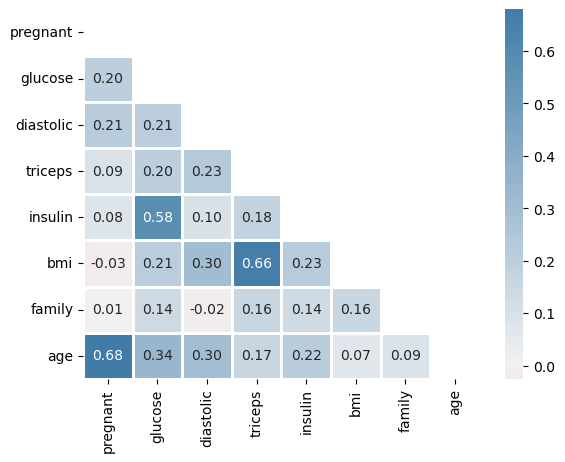

In [26]:
# Create the correlation matrix
corr = df_numeric_indian.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


In [27]:
# Calculate the correlation matrix and take the absolute value
corr_df = df_numeric_indian.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = df_numeric_indian.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")


The reduced_df DataFrame has 8 columns.


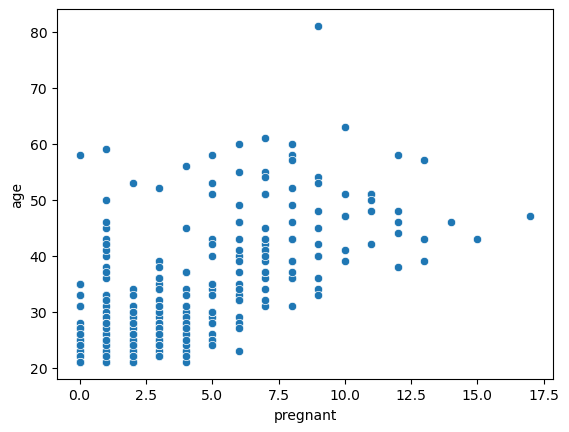

In [28]:
# Put on the x-axis and the number on the y-axis
sns.scatterplot(x="pregnant", y="age", data=df_numeric_indian)
plt.show()


In [29]:
# Print out the correlation matrix 
df_numeric_indian.corr()


,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age
pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641
diastolic,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039
triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814
family,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000


In [30]:
# Select the column as the feature to be predicted (y)
y = df_indian['test']

# Remove the column to create the training data
X = df_indian.drop('test', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

lr = LogisticRegression()

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


78.8% accuracy on test set.
{'pregnant': 0.48, 'glucose': 0.92, 'diastolic': 0.04, 'triceps': 0.22, 'insulin': 0.04, 'bmi': 0.4, 'family': 0.37, 'age': 0.15}


In [31]:
# Remove the feature with the lowest model coefficient
X = df_indian[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [32]:
# Remove the 2 features with the lowest model coefficients
X = df_indian[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


In [33]:
# Only keep the feature with the highest coefficient
X = df_indian[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


75.5% accuracy on test set.
{'glucose': 1.28}


In [34]:
# Select the column as the feature to be predicted (y)
y = df_indian['test']

# Remove the column to create the training data
X = df_indian.drop('test', axis=1)

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the test set accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print(f"{acc:.1%} accuracy on test set.") 


{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


In [35]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)


[False  True False False False False False False]


In [36]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)


Index(['glucose'], dtype='object')


In [37]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)


In [38]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)


Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

In [39]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask using the support_ attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)


Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')


In [40]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)


Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'bmi'], dtype='object')


In [41]:
# Select the column as the feature to be predicted (y)
y = df_numeric_indian['age']

# Remove the column to create the training data
X = df_numeric_indian.drop('age', axis=1)

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)


Lasso()

In [42]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print(f"The model has ignored {n_ignored} out of {len(la.coef_)} features.")


The model can predict 61.9% of the variance in the test set.
The model has ignored 3 out of 7 features.


In [43]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")
print(f"{n_ignored_features} out of {len(la.coef_)} features were ignored.")


The model can predict 61.3% of the variance in the test set.
0 out of 7 features were ignored.


In [44]:
# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(f'Optimal alpha = {lcv.alpha_:.3f}')

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print(f'The model explains {r_squared:.1%} of the test set variance')

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print(f'{sum(lcv_mask)} features out of {len(lcv_mask)} selected')


Optimal alpha = 0.653
The model explains 60.9% of the test set variance
6 features out of 7 selected


In [45]:
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)


RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=3,
    verbose=1)

In [46]:
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')


The model can explain 57.1% of the variance in the test set


In [47]:
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_


The model can explain 55.3% of the variance in the test set


In [48]:
# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to rf_mask
rf_mask = rfe_rf.support_


The model can explain 64.0% of the variance in the test set


In [49]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)


[3 3 3 3 3 3 2]


In [50]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3
print(meta_mask)


[ True  True  True  True  True  True False]


In [51]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)


Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi'], dtype='object')


In [52]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
la.fit(scaler.fit_transform(X_train), y_train)
r_squared = la.score(scaler.transform(X_test), y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(la.coef_)} features.')


The model can explain 60.9% of the variance in the test set using 6 features.


In [53]:
sales_df = pd.read_csv('grocery_sales.csv')
sales_df


,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2
...,...,...,...,...
73,Y,Bananas,902,3169.8
74,Y,Oranges,1441,6856.1
75,Z,Apples,1441,7209.0
76,Z,Bananas,1199,4440.5


In [54]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())


  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


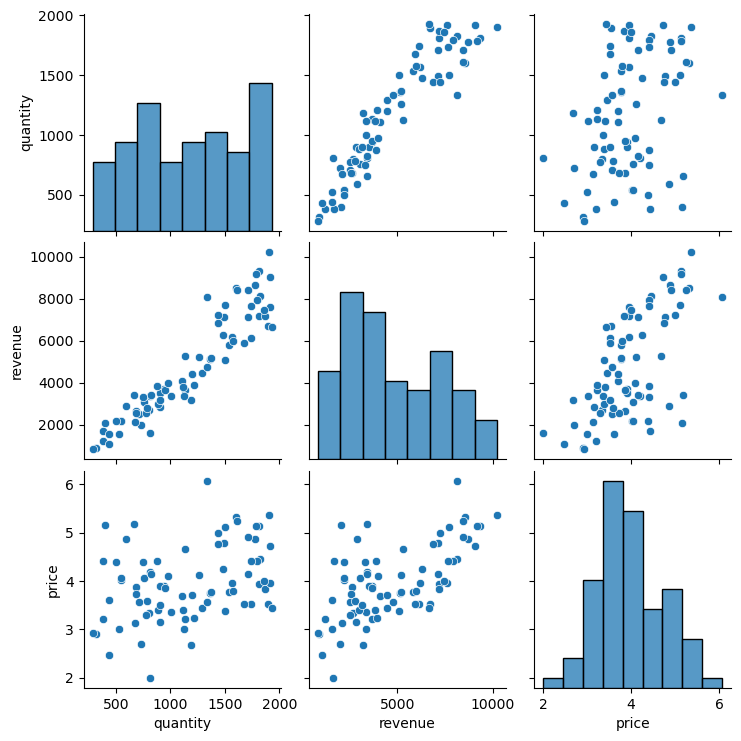

In [55]:
# Create a pairplot to inspect dataframe
sns.pairplot(sales_df)

plt.show()


In [56]:
sales_df = sales_df.drop(columns=['storeID','product'], axis=1)

# Create the scaler and standardize the data
scaler = StandardScaler()
sales_std = scaler.fit_transform(sales_df)


In [57]:
# Create the scaler and standardize the data
scaler = StandardScaler()
sales_std = scaler.fit_transform(sales_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(sales_std)

# This changes the numpy array output back to a DataFrame
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3'])


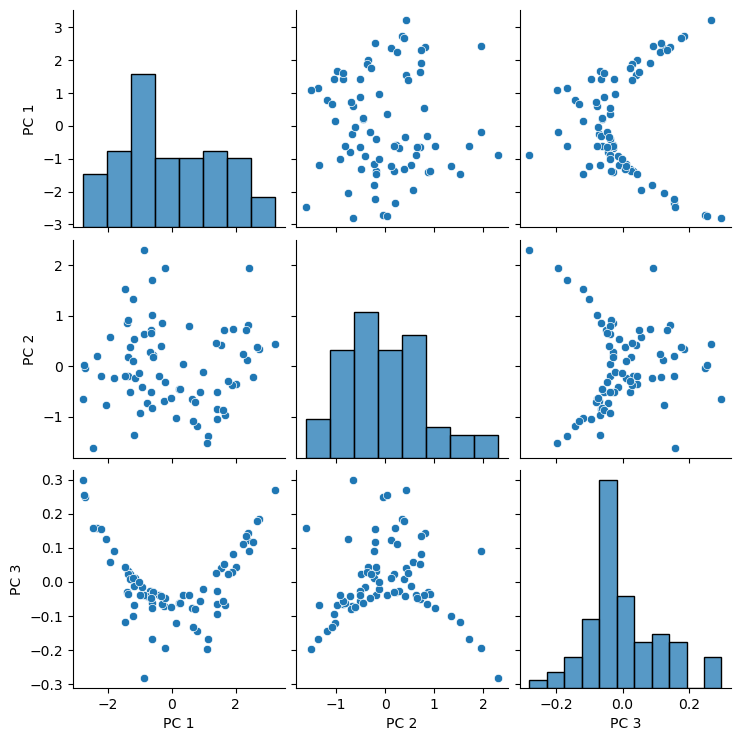

In [58]:
# Create the scaler
scaler = StandardScaler()
sales_std = scaler.fit_transform(sales_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(sales_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()


In [59]:
# Scale the data
scaler = StandardScaler()
sales_std = scaler.fit_transform(sales_df)

# Apply PCA
pca = PCA()
pca.fit(sales_std)


PCA()

In [60]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)


[0.7722606  0.22368963 0.00404976]


In [61]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())


[0.7722606  0.99595024 1.        ]


In [62]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])


In [63]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(sales_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(sales_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(sales_df.columns, vectors[1]))))


PC 1 effects = {'quantity': 0.59, 'revenue': 0.65, 'price': 0.48}
PC 2 effects = {'quantity': -0.53, 'revenue': -0.14, 'price': 0.84}


In [64]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(sales_df)

print(pc)


[[ 2.73267233  0.3416395 ]
 [-0.9299639  -0.40824568]
 [ 2.39055645  0.80710128]
 [ 2.67429435  0.38486811]
 [-0.58606291  0.22554752]
 [-2.7029626  -0.03645121]
 [-1.37092295 -0.18494918]
 [ 0.14525852 -1.01664134]
 [-0.64198827  0.71467875]
 [ 2.42561486  1.95114061]
 [ 1.41312979 -0.51603651]
 [ 0.80109486 -1.17598745]
 [-1.31691667 -0.499809  ]
 [-1.1553489  -0.2313024 ]
 [ 1.41910666 -0.84652093]
 [ 0.21392644 -0.45165914]
 [ 0.61813269 -0.65595858]
 [-0.24310017 -0.68256549]
 [ 2.01660824 -0.35651195]
 [-2.04454095 -0.7580853 ]
 [-1.39732776  0.86377858]
 [ 1.89193859 -0.36464214]
 [-0.4086261  -0.19437582]
 [ 2.36409418  0.12465507]
 [-1.37208422  0.91228974]
 [ 0.8755786  -0.51234996]
 [ 1.91766753  0.7358364 ]
 [ 1.14560594 -1.37241021]
 [-1.19488751 -1.35345937]
 [ 0.96778471 -0.12174199]
 [-0.67783298  0.29099925]
 [-2.34988484  0.20767337]
 [ 1.42124918 -1.03266911]
 [-1.38144937  0.17664013]
 [ 0.34674588  0.04476223]
 [-0.88099545  2.29958966]
 [ 2.23985326  0.25185403]
 

In [65]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(sales_df)

# Add the 2 components to poke_cat_df
sales_df['PC 1'] = pc[:, 0]
sales_df['PC 2'] = pc[:, 1]

print(sales_df.head())


   quantity  revenue     price      PC 1      PC 2
0      1811   9300.6  5.135616  2.732672  0.341640
1      1003   3375.2  3.365105 -0.929964 -0.408246
2      1604   8528.5  5.317020  2.390556  0.807101
3      1785   9181.0  5.143417  2.674294  0.384868
4       944   3680.2  3.898517 -0.586063  0.225548


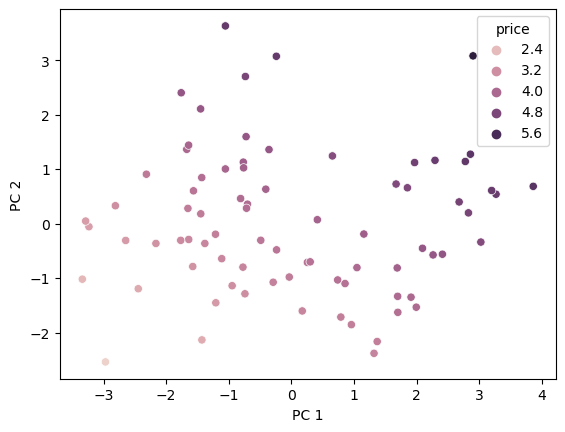

In [66]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to sales_df and transform the data
pc = pipe.fit_transform(sales_df)

# Add the 2 components to sales_df
sales_df['PC 1'] = pc[:, 0]
sales_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=sales_df, 
                x='PC 1', y='PC 2', hue='price')
plt.show()


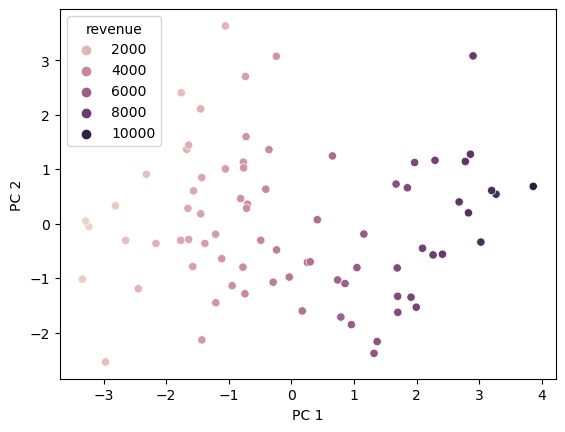

In [67]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(sales_df)

# Add the 2 components to sales_df
sales_df['PC 1'] = pc[:, 0]
sales_df['PC 2'] = pc[:, 1]

# Use the revenue feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=sales_df, 
                x='PC 1', y='PC 2', hue='revenue')
plt.show()


In [68]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])


In [69]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)


[0.36494316 0.2069696 ]


In [70]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')


7.6% test set accuracy


In [71]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')


[0.36494316 0.2069696  0.18193717]
11.9% test set accuracy
